In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./EA - Data - Group 9.xlsx", sheet_name='Survey Data')

In [3]:
df

,Case,PRYTST,PRYNAT,PRYFLV,PRYHLT,RUCTST,RUCNAT,RUCFLV,RUCHLT,PNCTST,...,MORNAT,MORFLV,MORHLT,NLNTST,NLNNAT,NLNFLV,NLNHLT,Age,Gender,Occupation
0,1,5,7,4,7,5,6,6,7,7,...,3,7,2,5,2,7,1,47,F,Worker
1,2,7,5,7,2,6,5,6,2,5,...,7,6,6,7,6,6,7,26,F,Professional
2,3,5,7,4,7,5,6,6,7,7,...,3,7,2,5,2,7,1,51,M,Professional
3,4,6,5,7,2,7,5,6,2,5,...,7,6,6,7,6,6,7,68,M,Worker
4,5,5,7,4,7,5,6,6,7,7,...,3,7,2,5,2,7,1,46,M,Professional
5,6,7,5,7,2,6,5,6,2,5,...,7,6,6,7,6,6,7,27,F,Worker
6,7,5,7,4,7,5,6,6,7,7,...,3,7,2,5,2,7,1,53,M,Worker
7,8,6,5,7,2,7,5,6,2,5,...,7,6,6,7,6,6,7,71,F,Professional


In [4]:
df.iloc[0]

Case               1
PRYTST             5
PRYNAT             7
PRYFLV             4
PRYHLT             7
RUCTST             5
RUCNAT             6
RUCFLV             6
RUCHLT             7
PNCTST             7
PNCNAT             4
PNCFLV             5
PNCHLT             6
MORTST             5
MORNAT             3
MORFLV             7
MORHLT             2
NLNTST             5
NLNNAT             2
NLNFLV             7
NLNHLT             1
Age               47
Gender             F
Occupation    Worker
Name: 0, dtype: object

In [5]:
df.iloc[0].to_dict()

{'Case': 1,
 'PRYTST': 5,
 'PRYNAT': 7,
 'PRYFLV': 4,
 'PRYHLT': 7,
 'RUCTST': 5,
 'RUCNAT': 6,
 'RUCFLV': 6,
 'RUCHLT': 7,
 'PNCTST': 7,
 'PNCNAT': 4,
 'PNCFLV': 5,
 'PNCHLT': 6,
 'MORTST': 5,
 'MORNAT': 3,
 'MORFLV': 7,
 'MORHLT': 2,
 'NLNTST': 5,
 'NLNNAT': 2,
 'NLNFLV': 7,
 'NLNHLT': 1,
 'Age': 47,
 'Gender': 'F',
 'Occupation': 'Worker'}

In [6]:
cols = [ "Brand", "Taste", "Naturalness", "Flavor", "Healthy", "Age", "Gender", "Occupation", "Case"]

In [7]:
numrows = df.shape[0]
numcols = df.shape[1]


In [8]:
brandprefix = {"Priya": "PRY",
"Ruchi": "RUC",
"Pancharanga":"PNC",
"Mothers recipe":"MOR",
"Nolins":"NLN"
}

In [9]:
output = pd.DataFrame()

for  i in range (0, numrows):
    d = df.iloc[i].to_dict()
    rowdict = {}
    rowdict["Age"] = d["Age"]
    rowdict["Gender"] = d["Gender"]
    rowdict["Occupation"] = d["Occupation"]
    rowdict["Case"] = d["Case"]
    for item in brandprefix.items():
        newrowdict = rowdict.copy()
        brand = item[0]
        brprefix = item[1]
        newrowdict["Brand"] = brand
        newrowdict["Taste"] = d[brprefix+"TST"]
        newrowdict["Naturalness"] =  d[brprefix+"NAT"]
        newrowdict["Flavor"] =  d[brprefix+"FLV"]
        newrowdict["Healthy"] =  d[brprefix+"HLT"]
        output = output.append(newrowdict, ignore_index=True)
    
    
    
    #print(newrowdict)


/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_3549/2713902057.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(newrowdict, ignore_index=True)
/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_3549/2713902057.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(newrowdict, ignore_index=True)
/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_3549/2713902057.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(newrowdict, ignore_index=True)
/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_3549/2713902057.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [42]:
output.shape

(40, 9)

In [26]:

tempdf2 = output.groupby('Gender')[["Taste", "Naturalness", "Flavor", "Healthy"]].mean()

In [27]:
tempdf2.transpose()

Gender,F,M
Taste,6.00,5.60
Naturalness,5.45,4.75
Flavor,6.25,5.95
Healthy,4.15,4.45


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Taste'),
  Text(1, 0, 'Naturalness'),
  Text(2, 0, 'Flavor'),
  Text(3, 0, 'Healthy')])

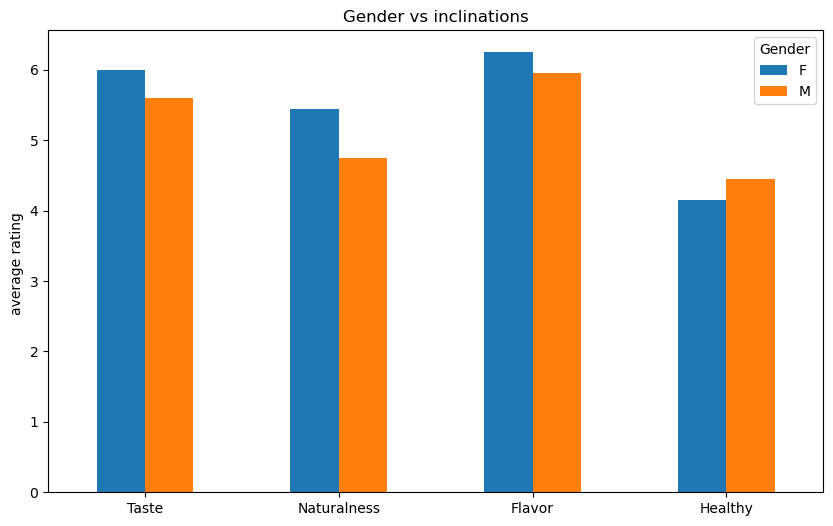

In [28]:
import matplotlib.pyplot as plt
tempdf2.transpose().plot(kind="bar",figsize=(10,6))
plt.title("Gender vs inclinations")
plt.xlabel("")
plt.ylabel("average rating ")

plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Taste'),
  Text(1, 0, 'Naturalness'),
  Text(2, 0, 'Flavor'),
  Text(3, 0, 'Healthy')])

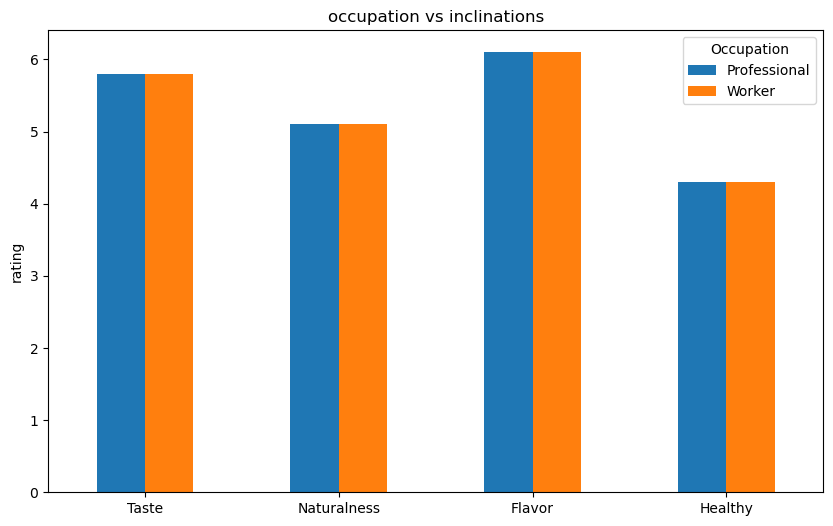

In [23]:

tempdf2 = output.groupby('Occupation')[["Taste", "Naturalness", "Flavor", "Healthy"]].mean()
tempdf2.transpose()
import matplotlib.pyplot as plt
tempdf2.transpose().plot(kind="bar",figsize=(10,6))
plt.title("occupation vs inclinations")
plt.xlabel("")
plt.ylabel("rating")

plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Taste'),
  Text(1, 0, 'Naturalness'),
  Text(2, 0, 'Flavor'),
  Text(3, 0, 'Healthy')])

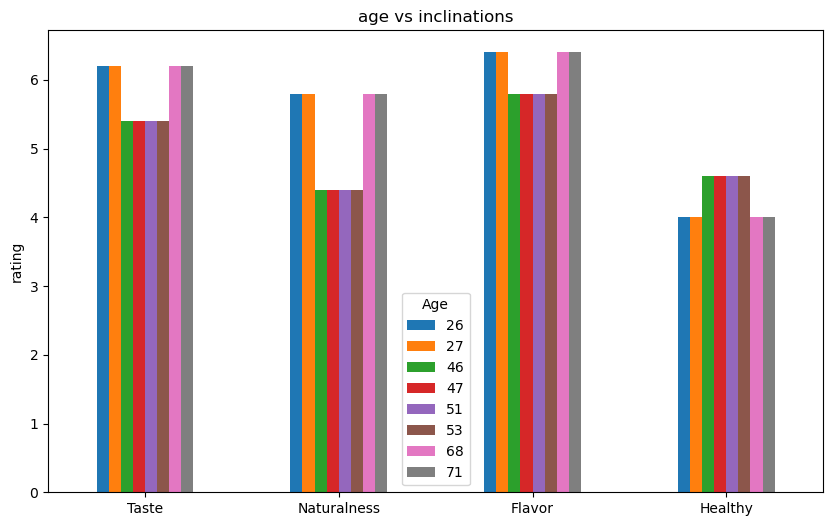

In [25]:

tempdf2 = output.groupby('Age')[["Taste", "Naturalness", "Flavor", "Healthy"]].mean()
tempdf2.transpose()
import matplotlib.pyplot as plt
tempdf2.transpose().plot(kind="bar",figsize=(10,6))
plt.title("age vs inclinations")
plt.xlabel("")
plt.ylabel("rating")

plt.xticks(rotation=0)

In [11]:
X = output[["Taste", "Naturalness", "Flavor", "Healthy"]]
y = output[["Brand"]]

In [12]:
X

,Taste,Naturalness,Flavor,Healthy
0,5,7,4,7
1,5,6,6,7
2,7,4,5,6
3,5,3,7,2
4,5,2,7,1
5,7,5,7,2
6,6,5,6,2
7,5,6,7,3
8,6,7,6,6
9,7,6,6,7


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_scaled = sc.fit_transform(X)

<frozen importlib._bootstrap>:219: RuntimeWarning:

scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject



In [76]:


from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_comp = pca.fit_transform(X_scaled)

In [82]:

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.57857666 0.24018086]


In [ ]:
# principal component 1 holds 57.2% of the information 
# while the principal component 2 holds only 24% of the information

In [78]:

dimreddf = pd.DataFrame(data = X_comp
             , columns = ['pc1', 'pc2'])

In [80]:
dimreddf["Brand"] =  output["Brand"]

In [81]:
dimreddf

,pc1,pc2,Brand
0,-2.406519,-1.323994,Priya
1,-0.891905,-1.104969,Ruchi
2,-0.966345,1.369048,Pancharanga
3,2.001279,-0.514127,Mothers recipe
4,2.597484,-0.356012,Nolins
5,0.904737,1.478350,Priya
6,0.526672,0.310751,Ruchi
7,0.728957,-0.919634,Pancharanga
8,-1.182030,-0.074313,Mothers recipe
9,-1.312330,1.134901,Nolins


<Figure size 640x480 with 0 Axes>

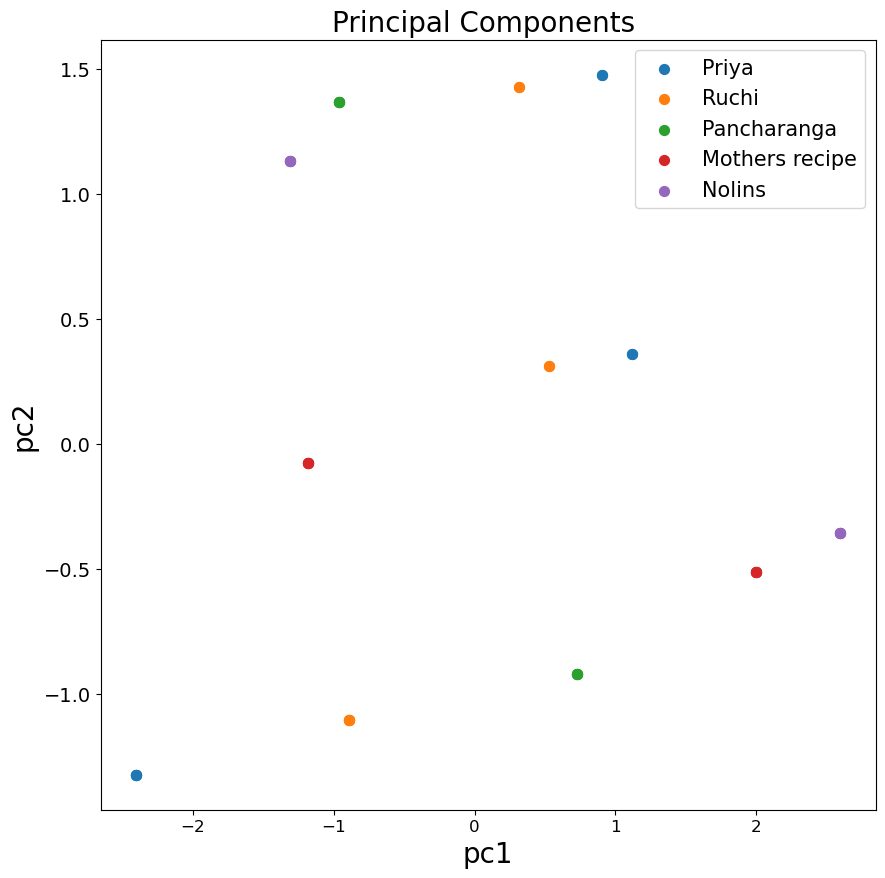

In [90]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('pc1',fontsize=20)
plt.ylabel('pc2',fontsize=20)
plt.title("Principal Components ",fontsize=20)
targets = output["Brand"].unique()
#colors = ['r', 'g', 'b', 'y','o']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for target, color in zip(targets,colors):
    indicesToKeep = dimreddf['Brand'] == target
    plt.scatter(dimreddf.loc[indicesToKeep, 'pc1']
               , dimreddf.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [93]:
Xagg = output[["Taste", "Naturalness", "Flavor", "Healthy","Brand"]]
y = output[["Brand"]]


In [95]:
Xagg

# Use GroupBy() to compute the sum
df2 = Xagg.groupby('Brand').sum()
print(df2)


                Taste  Naturalness  Flavor  Healthy
Brand                                              
Mothers recipe     44           40      52       32
Nolins             48           32      52       32
Pancharanga        48           40      48       36
Priya              46           48      44       36
Ruchi              46           44      48       36


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_scaled2 = sc.fit_transform(df2)

In [98]:


from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_comp2 = pca.fit_transform(X_scaled2)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.66103992 0.31024848]


In [99]:



dimreddf2 = pd.DataFrame(data = X_comp2
             , columns = ['pc1', 'pc2'])

dimreddf2["Brand"] =  Xagg["Brand"]

In [100]:
dimreddf2

,pc1,pc2,Brand
0,1.324376,1.865273,Priya
1,2.331411,-1.014715,Ruchi
2,-0.475299,-1.267505,Pancharanga
3,-2.201672,0.244457,Mothers recipe
4,-0.978816,0.172489,Nolins


<Figure size 640x480 with 0 Axes>

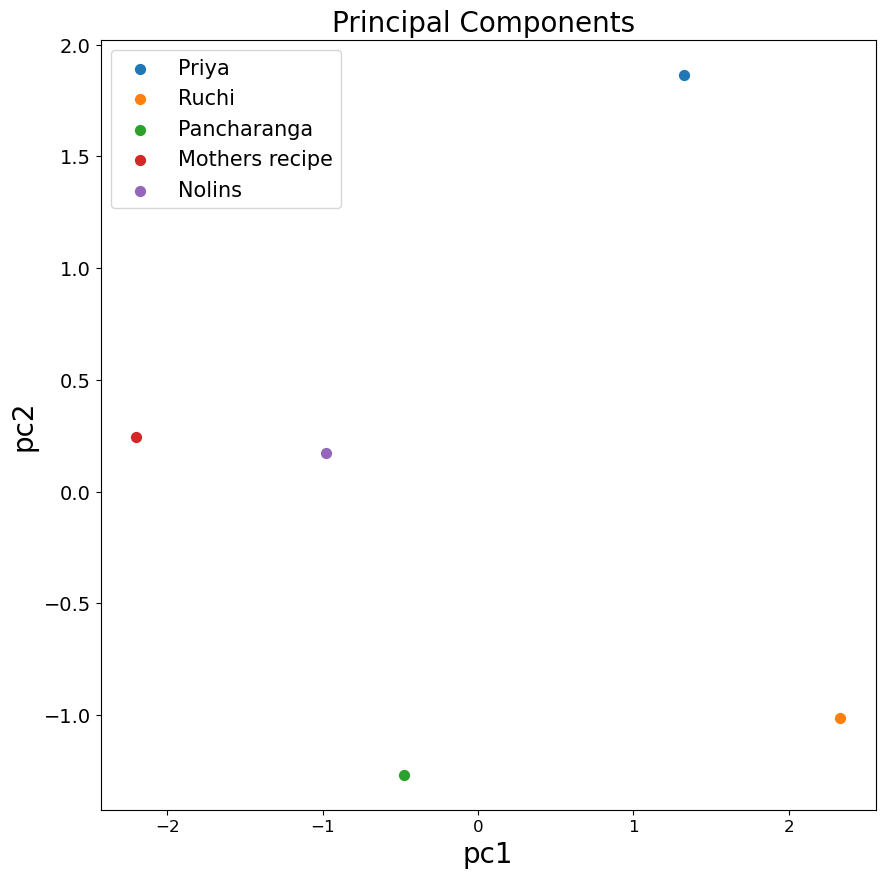

In [101]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('pc1',fontsize=20)
plt.ylabel('pc2',fontsize=20)
plt.title("Principal Components ",fontsize=20)
targets = dimreddf2["Brand"].unique()
#colors = ['r', 'g', 'b', 'y','o']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for target, color in zip(targets,colors):
    indicesToKeep = dimreddf2['Brand'] == target
    plt.scatter(dimreddf2.loc[indicesToKeep, 'pc1']
               , dimreddf2.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [104]:
x, y = dimreddf2["pc1"], dimreddf2["pc2"]
names = dimreddf2["Brand"]

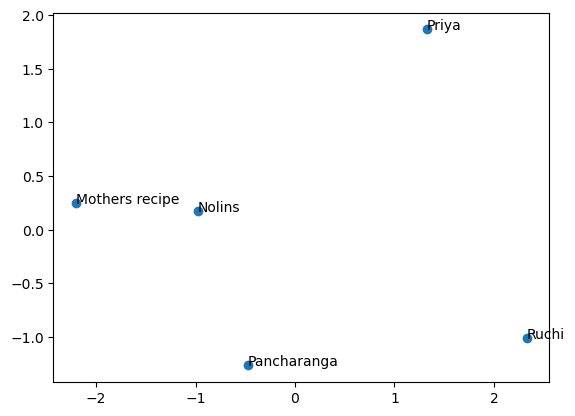

In [105]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)
for (varname, _x, _y) in zip(names, x, y):
    ax.annotate(varname, (_x, _y))
plt.show()

In [107]:
from sklearn import manifold

In [108]:
mds = manifold.MDS(2)
coords = mds.fit_transform(X_scaled2)
x, y = coords[:, 0], coords[:, 1]

/Users/srimugunthan/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



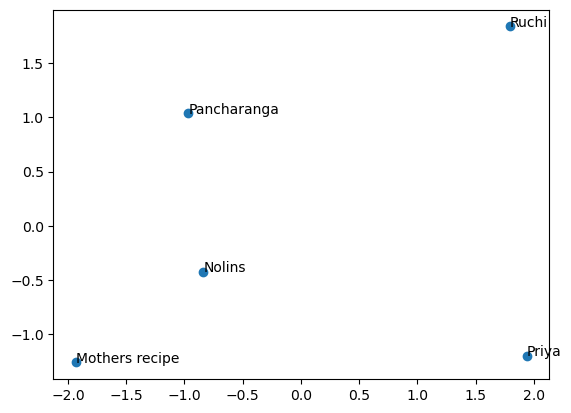

In [109]:
fig, ax = plt.subplots()
ax.scatter(x, y)
for (varname, _x, _y) in zip(names, x, y):
    ax.annotate(varname, (_x, _y))
plt.show()

In [32]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta



In [29]:
tempdf2 = output.groupby('Brand')[["Taste", "Naturalness", "Flavor", "Healthy"]].mean()

In [30]:
tempdf2

,Taste,Naturalness,Flavor,Healthy
Brand,,,,
Mothers recipe,5.50,5.0,6.5,4.0
Nolins,6.00,4.0,6.5,4.0
Pancharanga,6.00,5.0,6.0,4.5
Priya,5.75,6.0,5.5,4.5
Ruchi,5.75,5.5,6.0,4.5


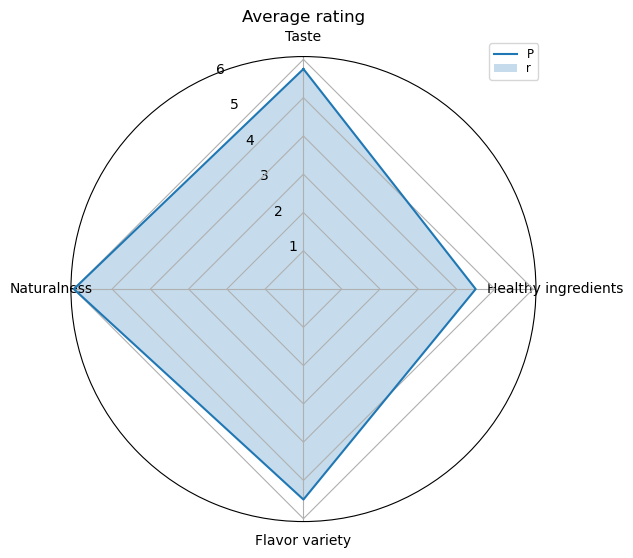

In [34]:
#https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python

data = [
        ['Taste', 'Naturalness', 'Flavor variety', 'Healthy ingredients'],
        ('Average rating', [
            [5.75, 6.0, 5.5, 4.5],
            [5.75,5.5,6.0,4.5],
            [6.00,5.0,6.0,4.5],
            [5.50,5.0,6.5,4.0],
            [6.00,4.0,6.5,4.0]])
    ]

N = len(data[0])
theta = radar_factory(N, frame='circle')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)


ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)
labels = ('Priya', 'Ruchi', 'Pancharanga', 'Mothers recipe', 'Nolins')
legend = ax.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='small')
plt.show()

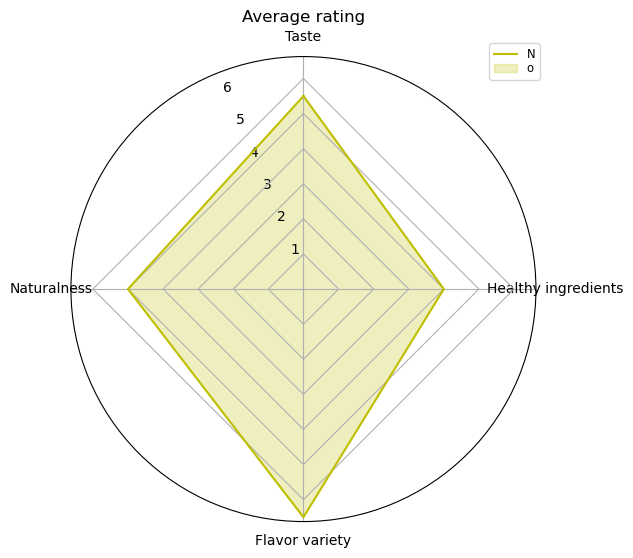

In [40]:
#https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python

data = [
        ['Taste', 'Naturalness', 'Flavor variety', 'Healthy ingredients'],
        ('Average rating', [

           [5.50,5.0,6.5,4.0]
   ])
    ]

N = len(data[0])
theta = radar_factory(N, frame='circle')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)


ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d, color='y')
    ax.fill(theta, d,  alpha=0.25,color='y')
ax.set_varlabels(spoke_labels)
labels = ('Nolins')
legend = ax.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='small')
plt.show()